# Optimizing E-commerce Shipping Using Machine Learning

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,balanced_accuracy_score,classification_report,precision_score,recall_score,roc_auc_score,mean_squared_error,r2_score,roc_curve

### Importing Dataset

In [2]:
data = pd.read_csv('Train.csv')

### Data Description
- ID: ID Number of Customers.
- Warehouse block:- The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment:-The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls:- The number of calls made from enquiry for enquiry of the shipment.
- Customer rating:- The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product-: Cost of the Product in US Dollars.
- Prior purchases:- The Number of Prior Purchase.
- Product importance:- The company has categorized the product in the various parameter such as low, medium, high.
- Gender:- Male and Female.
- Discount offered:- Discount offered on that specific product.
- Weight in gms:- It is the weight in grams.
- Reached on time:- It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [3]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
data.shape

(10999, 12)

In [5]:
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
data.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [7]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [9]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00
mean,5500.00,4.05,2.99,210.20,3.57,13.37,3634.02,0.60
std,3175.28,1.14,1.41,48.06,1.52,16.21,1635.38,0.49
min,1.00,2.00,1.00,96.00,2.00,1.00,1001.00,0.00
25%,2750.50,3.00,2.00,169.00,3.00,4.00,1839.50,0.00
50%,5500.00,4.00,3.00,214.00,3.00,7.00,4149.00,1.00
75%,8249.50,5.00,4.00,251.00,4.00,10.00,5050.00,1.00
max,10999.00,7.00,5.00,310.00,10.00,65.00,7846.00,1.00


In [10]:
pd.DataFrame(data['Reached.on.Time_Y.N'].value_counts())

,Reached.on.Time_Y.N
1,6563
0,4436


### Preprocessing

In [11]:
data = data.drop(['ID','Gender'], axis=1)

In [12]:
cat_cols = data.select_dtypes('object')
num_cols = data.select_dtypes('number')
cat_cols.columns,num_cols.columns

(Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance'], dtype='object'),
 Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
        'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
        'Reached.on.Time_Y.N'],
       dtype='object'))

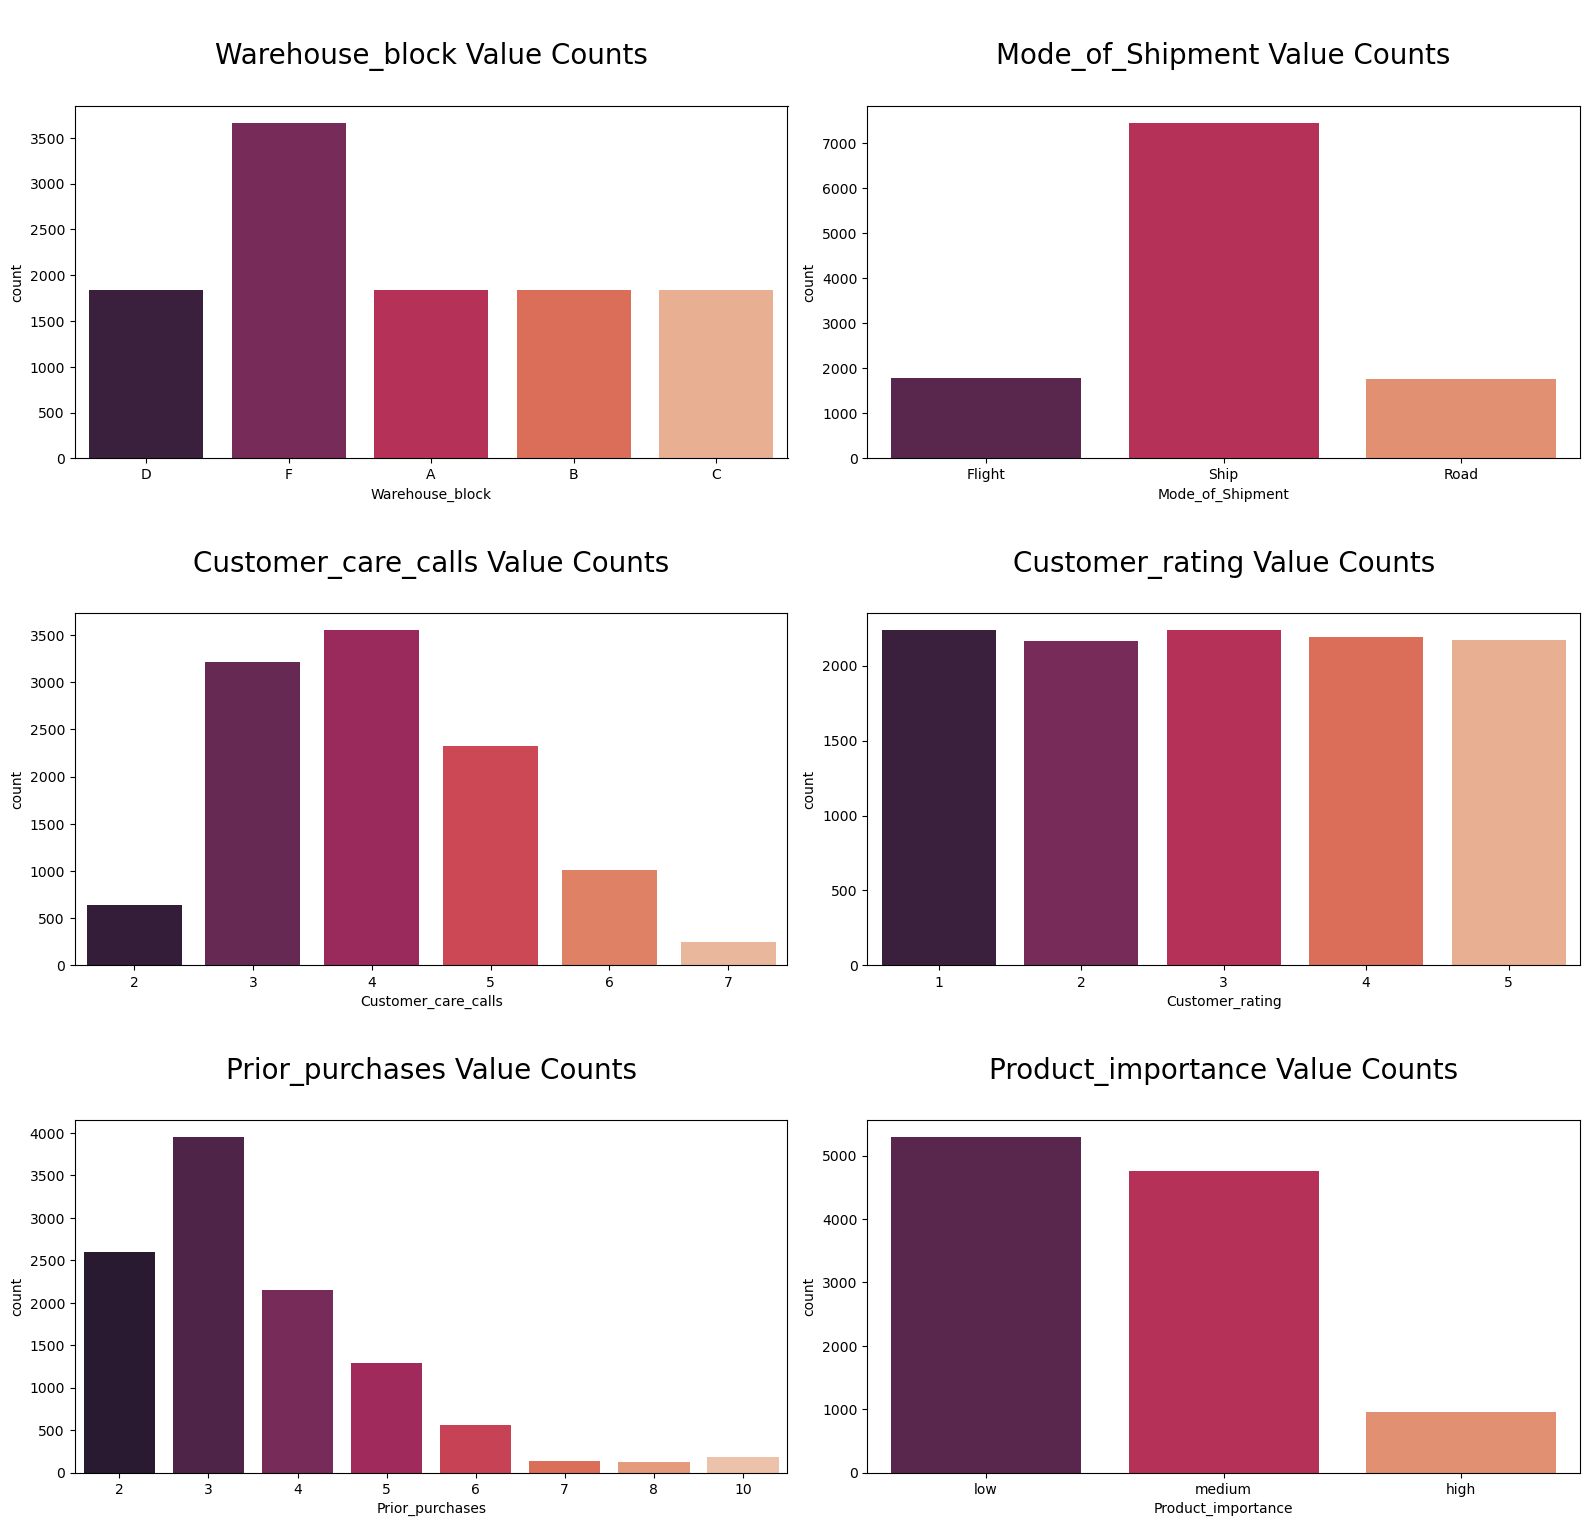

In [13]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating','Prior_purchases', 'Product_importance']

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cols[i], data = data, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

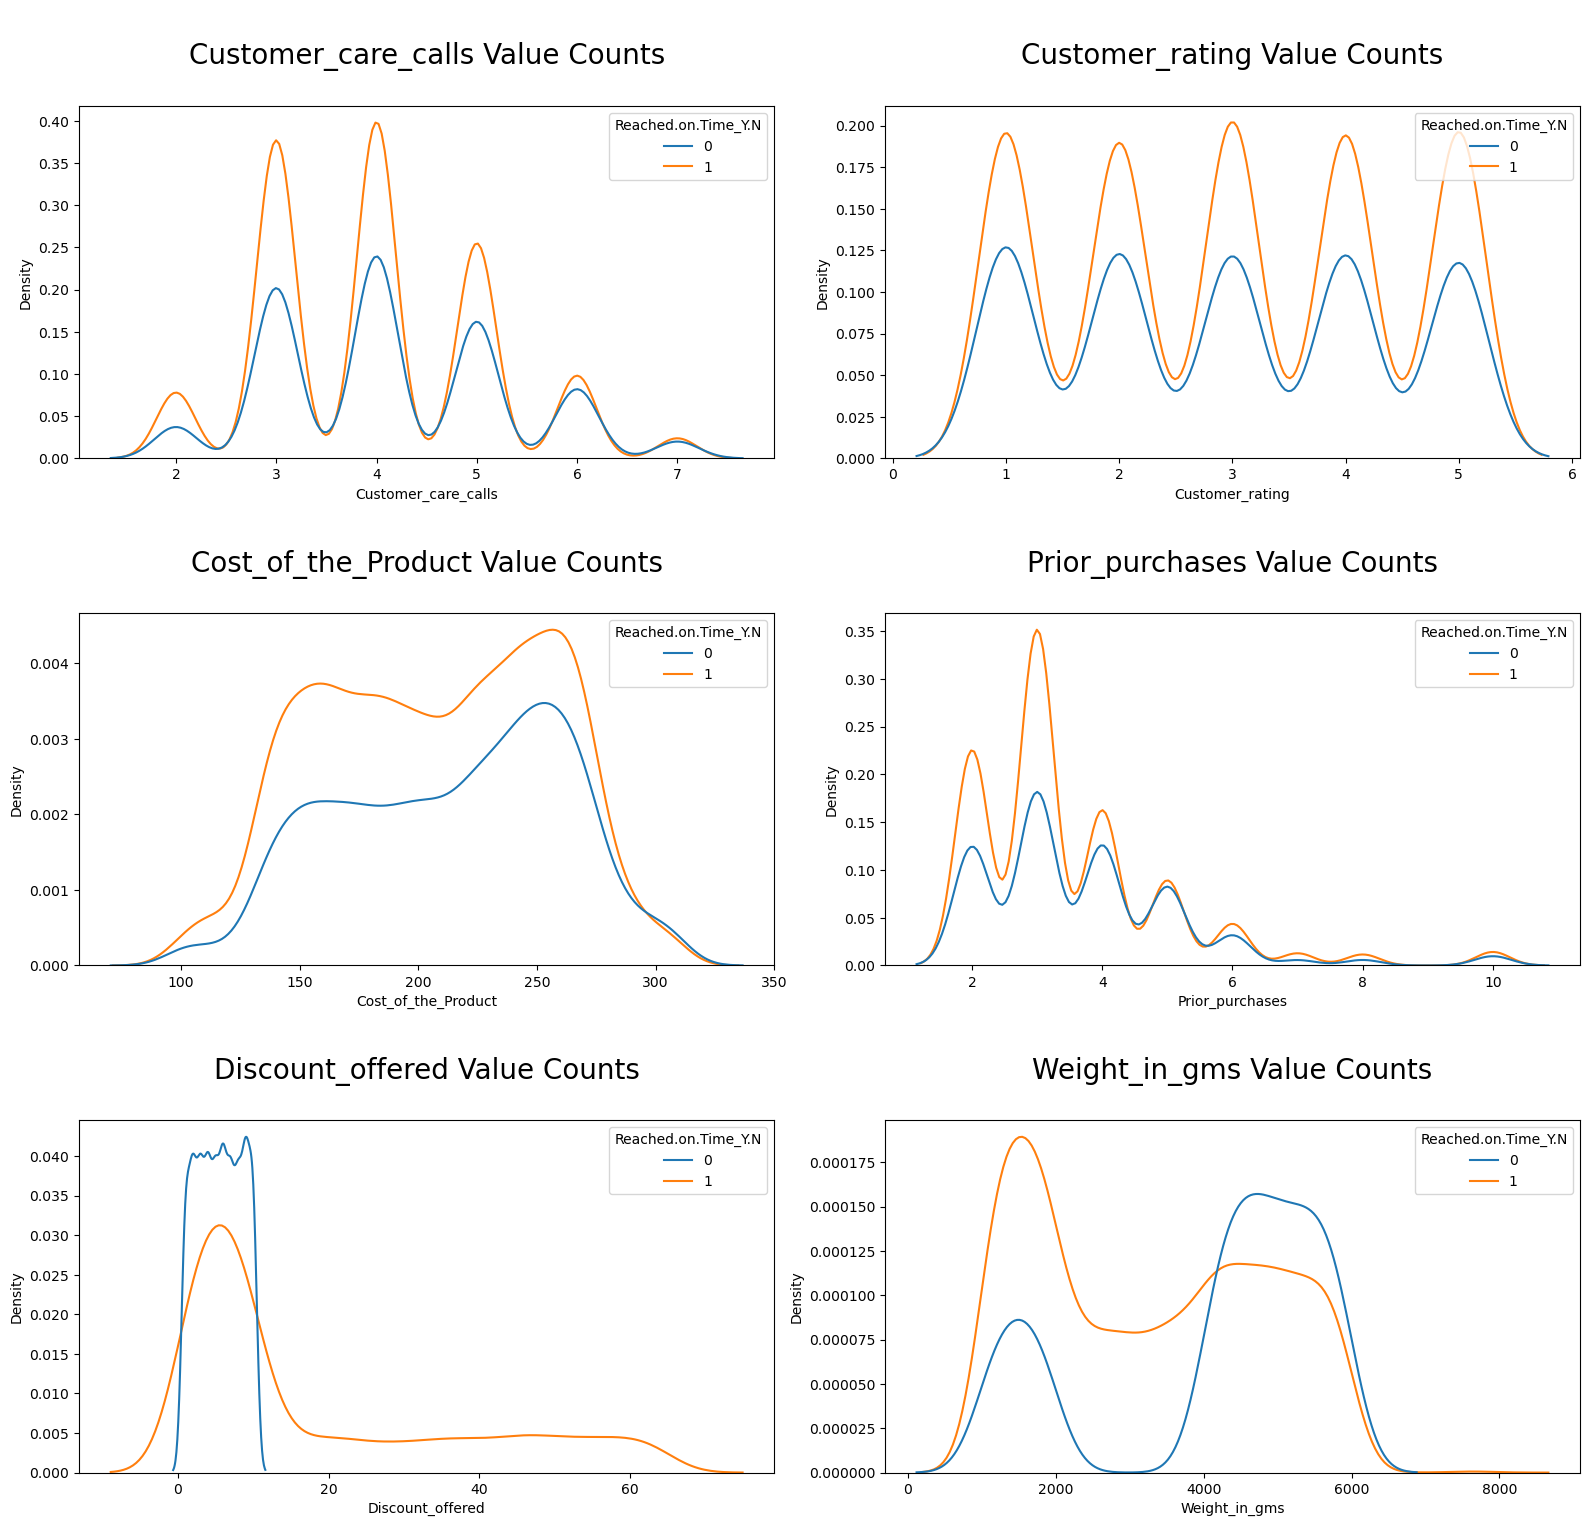

In [14]:
cols = [ 'Customer_care_calls', 'Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.kdeplot(x = cols[i], data = data, ax = ax,hue='Reached.on.Time_Y.N')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

<AxesSubplot:>

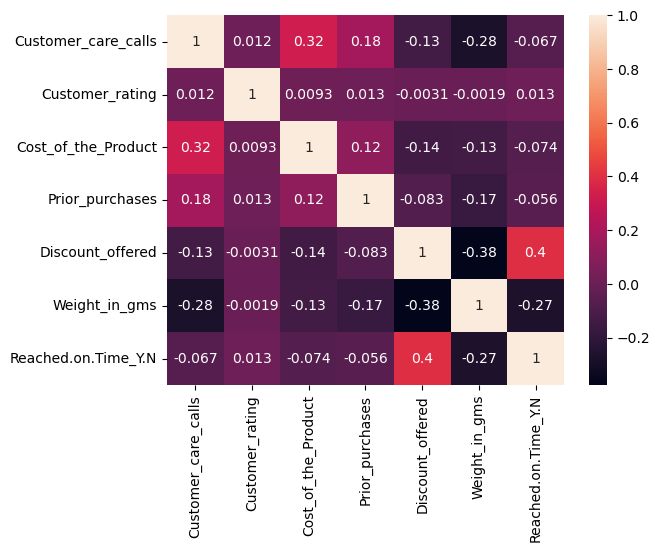

In [15]:
sns.heatmap(data.corr(), annot = True)

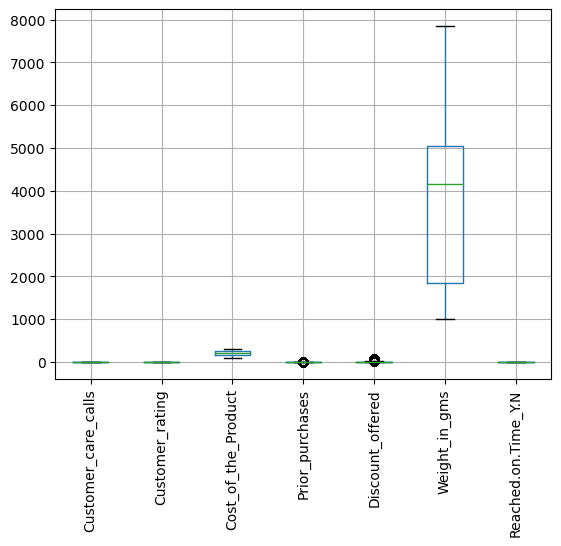

In [16]:
# outliers
data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [17]:
for col in cat_cols:
    le=LabelEncoder()
    le.fit(data[col])
    data[col]=le.transform(data[col])

### Extract X and y

In [18]:
X = data.drop(['Reached.on.Time_Y.N'],axis=1)
y = data['Reached.on.Time_Y.N']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Existing solution and methodology

### LogisticRegression

In [21]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [22]:
accuracy_score(y_test, y_pred)

0.634090909090909

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55       895
           1       0.69      0.69      0.69      1305

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.63      0.63      2200



### Proposed Methodology

## Random Forest

In [24]:
rf = RandomForestClassifier(criterion= 'entropy', max_depth=3, min_samples_leaf= 3,n_estimators= 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [25]:
accuracy_score(y_test, y_pred)

0.6777272727272727

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.78      0.66       895
           1       0.80      0.60      0.69      1305

    accuracy                           0.68      2200
   macro avg       0.69      0.69      0.68      2200
weighted avg       0.71      0.68      0.68      2200



[Text(0.5, 0.875, 'Weight_in_gms <= 0.238\nentropy = 0.97\nsamples = 5545\nvalue = [3511, 5288]\nclass = Delayed'),
 Text(0.25, 0.625, 'Weight_in_gms <= -0.992\nentropy = 0.738\nsamples = 2538\nvalue = [835, 3174]\nclass = Delayed'),
 Text(0.125, 0.375, 'Cost_of_the_Product <= -0.287\nentropy = 0.909\nsamples = 1638\nvalue = [829, 1730]\nclass = Delayed'),
 Text(0.0625, 0.125, 'entropy = 0.241\nsamples = 689\nvalue = [43, 1040]\nclass = Delayed'),
 Text(0.1875, 0.125, 'entropy = 0.997\nsamples = 949\nvalue = [786, 690]\nclass = On Time'),
 Text(0.375, 0.375, 'Discount_offered <= -0.178\nentropy = 0.039\nsamples = 900\nvalue = [6, 1444]\nclass = Delayed'),
 Text(0.3125, 0.125, 'entropy = 0.182\nsamples = 148\nvalue = [6, 211]\nclass = Delayed'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 752\nvalue = [0, 1233]\nclass = Delayed'),
 Text(0.75, 0.625, 'Prior_purchases <= -0.053\nentropy = 0.99\nsamples = 3007\nvalue = [2676, 2114]\nclass = On Time'),
 Text(0.625, 0.375, 'Weight_in_gms 

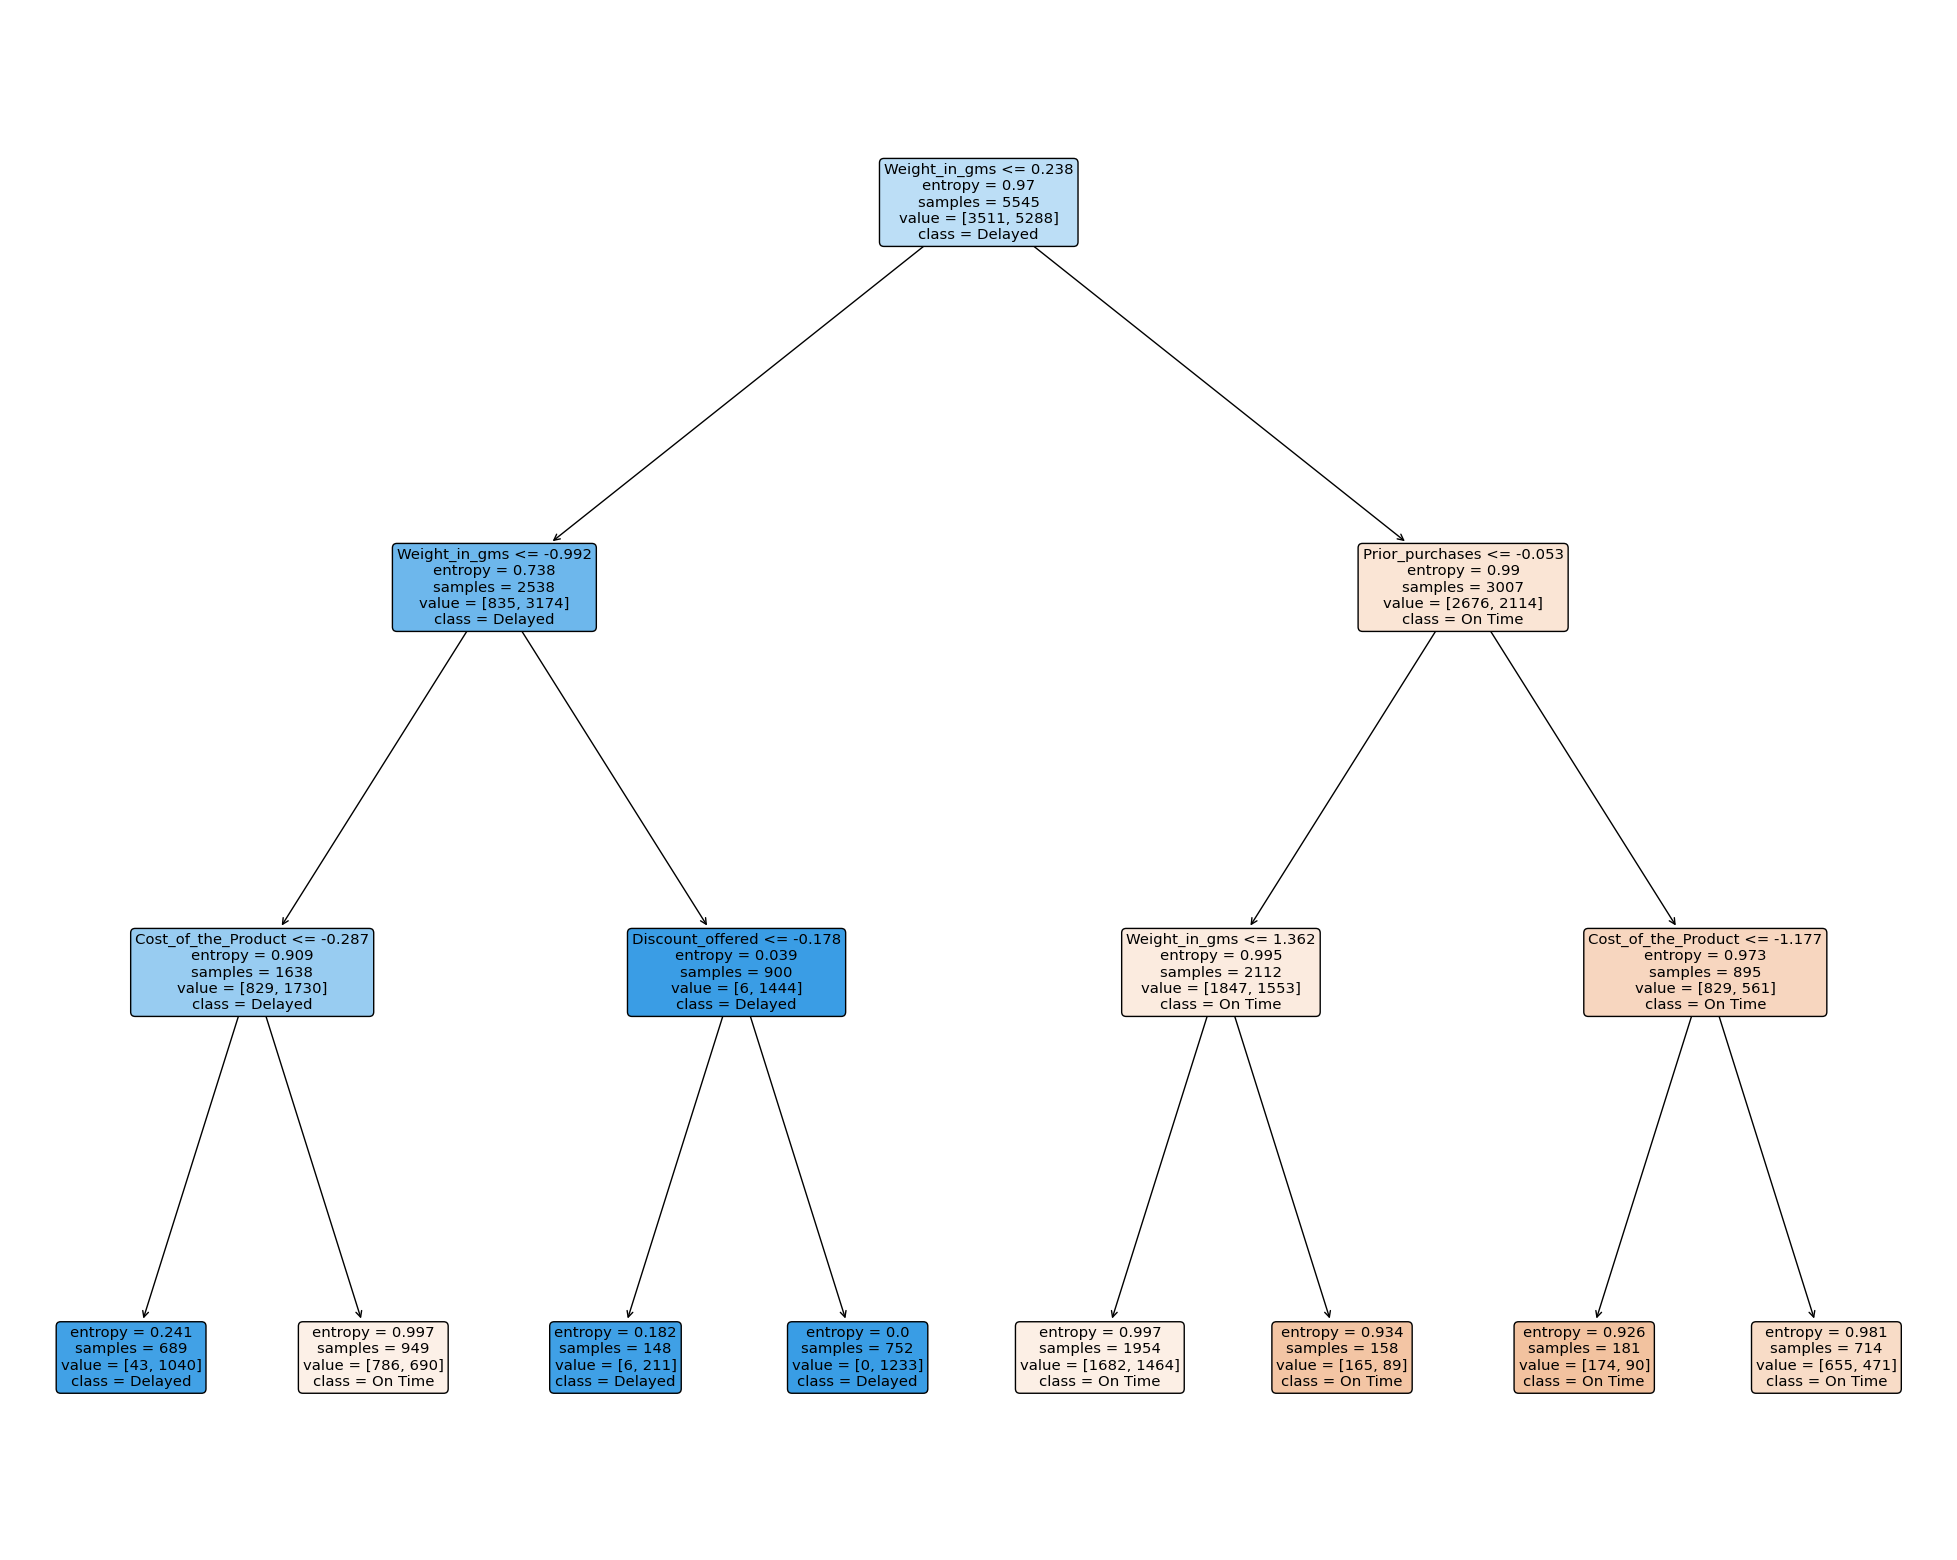

In [27]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(rf.estimators_[1],feature_names=X.columns,class_names=['On Time','Delayed'],filled = True, rounded = True)

In [28]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances

Warehouse_block       0.00
Mode_of_Shipment      0.00
Customer_care_calls   0.01
Customer_rating       0.00
Cost_of_the_Product   0.03
Prior_purchases       0.06
Product_importance    0.00
Discount_offered      0.58
Weight_in_gms         0.31
dtype: float64

<AxesSubplot:>

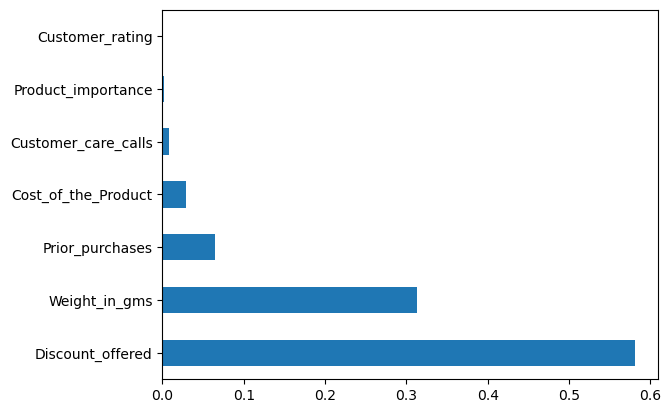

In [29]:
feat_importances.nlargest(7).plot(kind='barh')

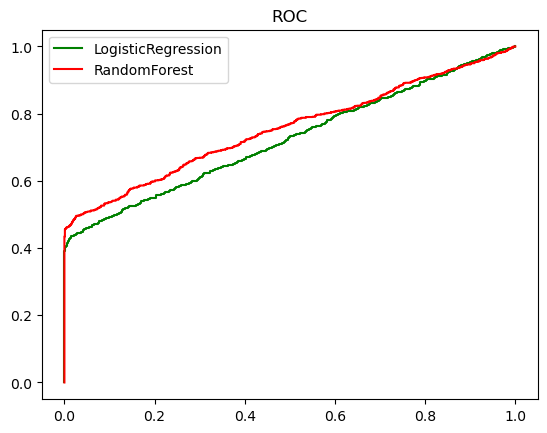

In [30]:
pred_prob  = classifier.predict_proba(X_test)
pred_prob1 = rf.predict_proba(X_test)
fpr,tbr,threshold    = roc_curve(y_test, pred_prob[:,1],pos_label=1)
fpr1,tbr1,threshold1 = roc_curve(y_test, pred_prob1[:,1],pos_label=1)
plt.plot(fpr, tbr, linestyle='-', color='green', label='LogisticRegression')
plt.plot(fpr1, tbr1, linestyle='-', color='red', label='RandomForest')

plt.title('ROC')
plt.legend(loc = 'best')
plt.show()

In [31]:
clf = LazyClassifier(verbose=0,ignore_warnings=True,predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:52<00:00,  1.82s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.66,0.71,0.71,0.65,0.03
GaussianNB,0.66,0.71,0.71,0.64,0.04
SVC,0.68,0.70,0.70,0.67,10.40
NearestCentroid,0.66,0.69,0.69,0.65,0.02
BernoulliNB,0.67,0.69,0.69,0.67,0.05
AdaBoostClassifier,0.68,0.69,0.69,0.68,0.64
BaggingClassifier,0.67,0.68,0.68,0.67,0.52
LGBMClassifier,0.66,0.67,0.67,0.66,0.23
RandomForestClassifier,0.67,0.67,0.67,0.67,2.22


# Predict Price of the Weight

In [32]:
X1 = data[['Weight_in_gms']]
y1 = data['Cost_of_the_Product']

In [33]:
lr=LinearRegression()
lr.fit(X1.values, y1.values)

LinearRegression()

### Predict Price of the new Weight

In [34]:
lr.predict([[9699]])

array([186.56041239])

In [35]:
y_pred = lr.predict(X1)
y_pred

array([219.55406694, 212.32476985, 211.21017202, ..., 219.85804817,
       219.64370243, 217.97180569])

In [36]:
print(mean_squared_error(y1, y_pred))
print(r2_score(y1, y_pred))

2269.251729972294
0.01758383342649006


# Predict the Discount of the Product Cost

In [37]:
X2 = data[['Cost_of_the_Product']]
y2 = data['Discount_offered']

In [38]:
lr=LinearRegression()
lr.fit(X2.values, y2.values)

LinearRegression()

### Predict the Discount of the  New Product Cost

In [39]:
lr.predict([[258]])

array([11.14393201])

In [40]:
y_pred = lr.predict(X2)
y_pred

array([14.92133852, 13.10258724, 14.64153063, ..., 11.89008638,
       12.7761447 , 15.94730078])

In [41]:
print(mean_squared_error(y2, y_pred))
print(r2_score(y2, y_pred))

257.5717523928283
0.019130122463358767
